Epoch 0: loss = 8.402411460876465
Epoch 100: loss = 0.1291414350271225
Epoch 200: loss = 0.08648183941841125
Epoch 300: loss = 0.04684029892086983
Epoch 400: loss = 0.011427859775722027
Epoch 500: loss = 0.009138484485447407
Epoch 600: loss = 0.0024199169129133224
Epoch 700: loss = 0.001558873220346868
Epoch 800: loss = 0.0018194937147200108
Epoch 900: loss = 0.0010477639734745026
Epoch 1000: loss = 0.004869624972343445
Epoch 1100: loss = 0.000904326734598726
Epoch 1200: loss = 0.000845264527015388
Epoch 1300: loss = 0.002703858772292733
Epoch 1400: loss = 0.0007686771568842232
Epoch 1500: loss = 0.0007035440066829324
Epoch 1600: loss = 0.0009888503700494766
Epoch 1700: loss = 0.0006359026883728802
Epoch 1800: loss = 0.0005765127716585994
Epoch 1900: loss = 0.0005478450912050903


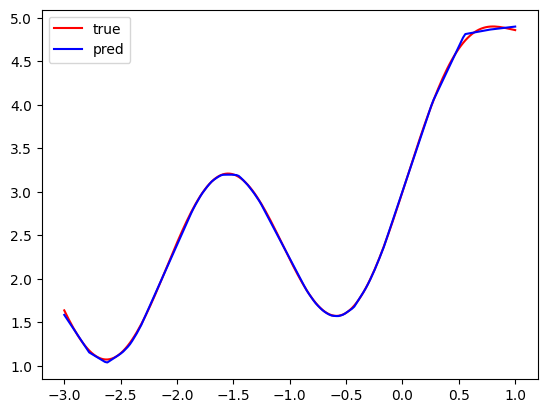

In [378]:
import tensorflow as tf
import numpy as np

def my_func(x):
    return np.sin(3*x) + np.exp(x) + 2 

h_dim = 600
reg = 0.00001
log_interval = 100
class my_model(tf.Module):
    def __init__(self):
        self.W1 = tf.Variable(tf.random.uniform([1, h_dim], minval=-0.1, maxval=0.1), trainable=True)
        self.b1 = tf.Variable(tf.zeros([h_dim]), trainable=True)
        self.W2 = tf.Variable(tf.random.uniform([h_dim, 1], minval=-0.1, maxval=0.1), trainable=True)
        self.b2 = tf.Variable(tf.zeros([1]), trainable=True)

    def __call__(self, x):
        x = tf.nn.relu(tf.matmul(x, self.W1) + self.b1)
        return tf.matmul(x, self.W2) + self.b2

@tf.function
def compute_loss(logits, y):
    return tf.reduce_mean(tf.losses.MSE(y, logits)) + tf.nn.l2_loss(model.W1) * reg + tf.nn.l2_loss(model.W2) * reg

@tf.function
def train_one_step(model, optimizer, x, y):
    with tf.GradientTape() as tape:
        logits = model(x)
        loss = compute_loss(logits, y)

    trainable_vars = [model.W1, model.b1, model.W2, model.b2]
    grads = tape.gradient(loss, trainable_vars)

    optimizer.apply_gradients(zip(grads, trainable_vars))

    return loss

model = my_model()
optimizer = tf.optimizers.Adam(learning_rate=0.01)
x = tf.cast(tf.linspace(-3, 1, 200)[:, tf.newaxis], dtype=tf.float32)
y = my_func(x)

for epoch in range(2000):
    loss = train_one_step(model, optimizer, x, y)
    if epoch % log_interval == 0:
        print(f'Epoch {epoch}: loss = {loss}')

import matplotlib.pyplot as plt
plt.plot(x, y, label='true', color='r')
plt.plot(x, model(x), label='pred', color='b')
plt.legend()
plt.show()